In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [136]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)   

616

In [137]:
#URL for Weather Map API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#build our query url

query_url = f"{url}appid={api_key}&units={units}&q="

#empty list to store our data
city_info = []
#lat = []
#temp = []
#humidity = []
#wind_speed = []
#cloudiness = []

record_count=1

print("Beginning Data Retrieval")
print("----------------------------")
for city in cities:
    print(f"Processing Record {record_count}")
    record_count+=1
    try:
        response = requests.get(query_url + city).json()
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        wind_speed = response['wind']['speed']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = response['dt']
        city_info.append({"City": city,
                          "Cloudiness":cloudiness,
                          "Country":country,
                          "Date":date,
                          "Humidity":humidity,
                          "Lat": lat,
                          "Lng":lng,
                          "Max Temp": temp,
                          "Wind Speed":wind_speed})
        
    except KeyError:
        print("City Not Found. Skipping...")

    
print("----------------------------")        
print("Data Retrieval Complete")
print("----------------------------")    
   






Beginning Data Retrieval
----------------------------
Processing Record 1
Processing Record 2
Processing Record 3
Processing Record 4
Processing Record 5
Processing Record 6
Processing Record 7
Processing Record 8
Processing Record 9
Processing Record 10
Processing Record 11
Processing Record 12
Processing Record 13
Processing Record 14
Processing Record 15
Processing Record 16
Processing Record 17
Processing Record 18
Processing Record 19
Processing Record 20
Processing Record 21
Processing Record 22
Processing Record 23
Processing Record 24
Processing Record 25
Processing Record 26
Processing Record 27
City Not Found. Skipping...
Processing Record 28
Processing Record 29
Processing Record 30
Processing Record 31
Processing Record 32
City Not Found. Skipping...
Processing Record 33
Processing Record 34
Processing Record 35
Processing Record 36
Processing Record 37
Processing Record 38
Processing Record 39
Processing Record 40
Processing Record 41
Processing Record 42
Processing Record

Processing Record 340
Processing Record 341
Processing Record 342
Processing Record 343
Processing Record 344
Processing Record 345
Processing Record 346
Processing Record 347
Processing Record 348
Processing Record 349
Processing Record 350
Processing Record 351
Processing Record 352
Processing Record 353
Processing Record 354
Processing Record 355
City Not Found. Skipping...
Processing Record 356
Processing Record 357
Processing Record 358
Processing Record 359
Processing Record 360
City Not Found. Skipping...
Processing Record 361
Processing Record 362
Processing Record 363
Processing Record 364
Processing Record 365
Processing Record 366
Processing Record 367
Processing Record 368
City Not Found. Skipping...
Processing Record 369
Processing Record 370
Processing Record 371
Processing Record 372
Processing Record 373
Processing Record 374
City Not Found. Skipping...
Processing Record 375
City Not Found. Skipping...
Processing Record 376
Processing Record 377
Processing Record 378
Pr

In [138]:
city_df = pd.DataFrame(city_info)

lat = city_df["Lat"]
lng = city_df["Lng"]
max_temp = city_df["Max Temp"]
humidity=city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

city_df.to_csv(output_data_file,index_label="city_ID")

city_df.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

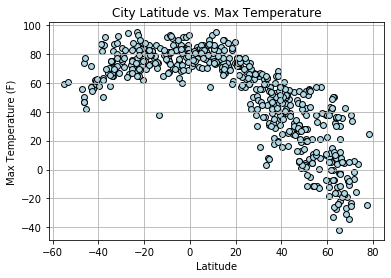

In [139]:
#plotting our data
plt.scatter(city_df["Lat"],city_df["Max Temp"],facecolors="lightblue",edgecolors="black" ,marker="o", s=35, alpha= 1)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig1.png")
plt.show()

In [ ]:
#In the plot above you can see a clear relationship between latitude and max temperature.
#The max temperature increases from left to right until you cross 0 latitude, at which point you see a sharp
#decrease in max temperature.

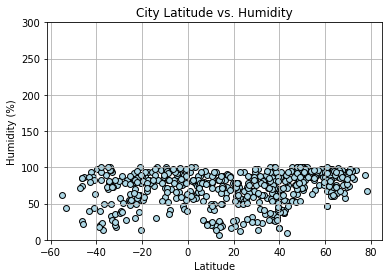

In [140]:
#plotting our values
plt.scatter(city_df["Lat"],city_df["Humidity"],facecolors="lightblue",edgecolors="black",marker="o", s=35, alpha= 1)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 300)
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig2.png")
plt.show()

In [ ]:
#In the plot above there is no visible relationship between latitude and humidity

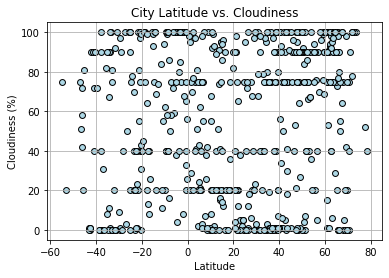

In [141]:
#plotting our values
plt.scatter(city_df["Lat"],city_df["Cloudiness"],facecolors="lightblue",edgecolors="black",marker="o", s=35, alpha= 1)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig3.png")
plt.show()

In [ ]:
#In the plot above there is no visible relationship between latitude and cloudiness. The one noticeable trend is
#cities with latitude above 0 tend to have the least cloudiness (observe cloudiness 0 after latitude 0)

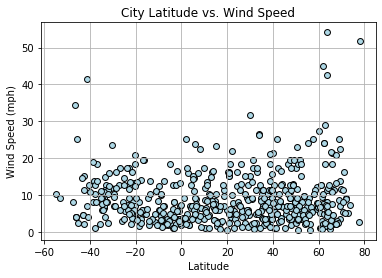

In [142]:
plt.scatter(city_df["Lat"],city_df["Wind Speed"],facecolors="lightblue",edgecolors="black",marker="o", s=35, alpha= 1)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig4.png")
plt.show()

In [119]:
#One observable relationship is the lowest and highest latitude values have the highest instances of wind speed

In [143]:
#linear regression function to create our plots

def plot_linear_regression(plt, x, y, color) :
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(x, intercept + slope*x, color)

In [144]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = city_df[city_df["Lat"]>=0].copy()
southern_hemisphere_df = city_df[city_df["Lat"]<0].copy()

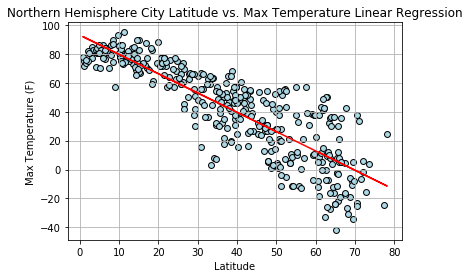

In [145]:
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
plot_linear_regression(plt, northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], 'r')
plt.title("Northern Hemisphere City Latitude vs. Max Temperature Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig5.png")
plt.show()


In [ ]:
#As you can see, as latitude increases in the northern hemisphere, max temp goes down.

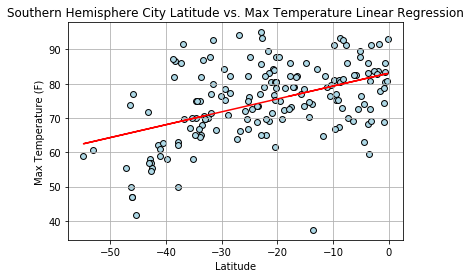

In [146]:
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
plot_linear_regression(plt, southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], 'r')
plt.title("Southern Hemisphere City Latitude vs. Max Temperature Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig6.png")
plt.show()

In [ ]:
#As you can see, as latitude increases in the southern hemisphere, max temp increases.

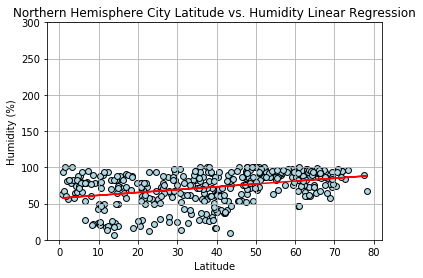

In [147]:
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
plot_linear_regression(plt, northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], 'r')
plt.title("Northern Hemisphere City Latitude vs. Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,300)
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig7.png")
plt.show()

In [ ]:
#As latitude goes up in the northern hemisphere, the humidity increases slightly.

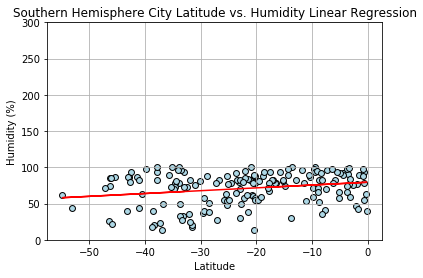

In [148]:
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
plot_linear_regression(plt, southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], 'r')
plt.title("Southern Hemisphere City Latitude vs. Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 300)
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig8.png")
plt.show()

In [ ]:
#As latitude increases in the southern hemisphere, humidity increases by a small amount.

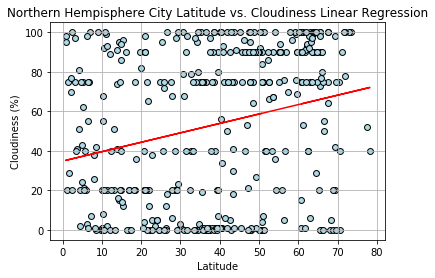

In [149]:
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
plot_linear_regression(plt, northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], 'r')
plt.title("Northern Hempisphere City Latitude vs. Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig9.png")
plt.show()

In [ ]:
#As latitude increases in the northern hemisphere, cloudiness goes up.

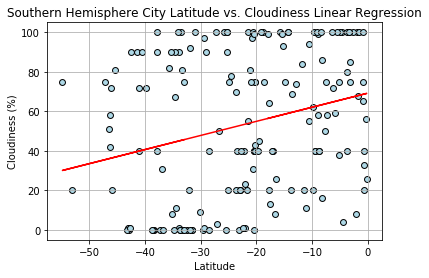

In [150]:
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
plot_linear_regression(plt, southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], 'r')
plt.title("Southern Hemisphere City Latitude vs. Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig10.png")
plt.show()

In [ ]:
#As latitude increases in the southern hemisphere, cloudiness goes up.

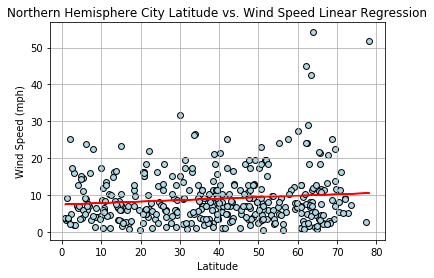

In [151]:
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
plot_linear_regression(plt, northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], 'r')
plt.title("Northern Hemisphere City Latitude vs. Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig11.png")
plt.show()

In [ ]:
#As latitude increases in the northern hemisphere, windspeed increases by a small amount. You can see
#by the plot points that the highest wind is at the highest latitude.

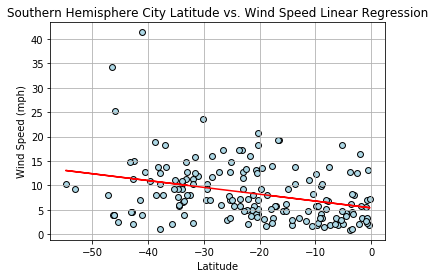

In [152]:
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"],facecolors="lightblue",
edgecolors="black" ,marker="o", s=35, alpha= 1)
plot_linear_regression(plt, southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], 'r')
plt.title("Southern Hemisphere City Latitude vs. Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-")
plt.savefig("output_data/city_df_fig12.png")
plt.show()

In [ ]:
#As latitude increases in the southern hemisphere, windspeed decreases.